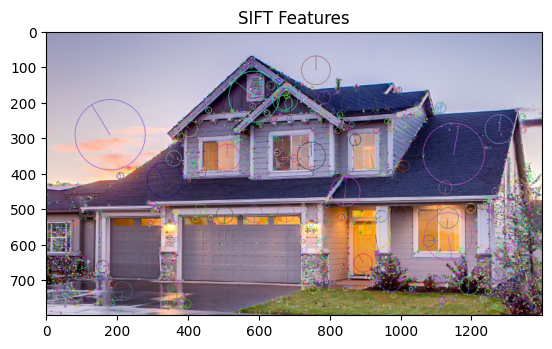

In [5]:
import cv2
import matplotlib.pyplot as plt

# 이미지 로드
image = cv2.imread('image.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# SIFT 특징 추출기 생성
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray, None)

# 특징점을 이미지에 그리기
img_sift = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(cv2.cvtColor(img_sift, cv2.COLOR_BGR2RGB))
plt.title('SIFT Features')
plt.show()

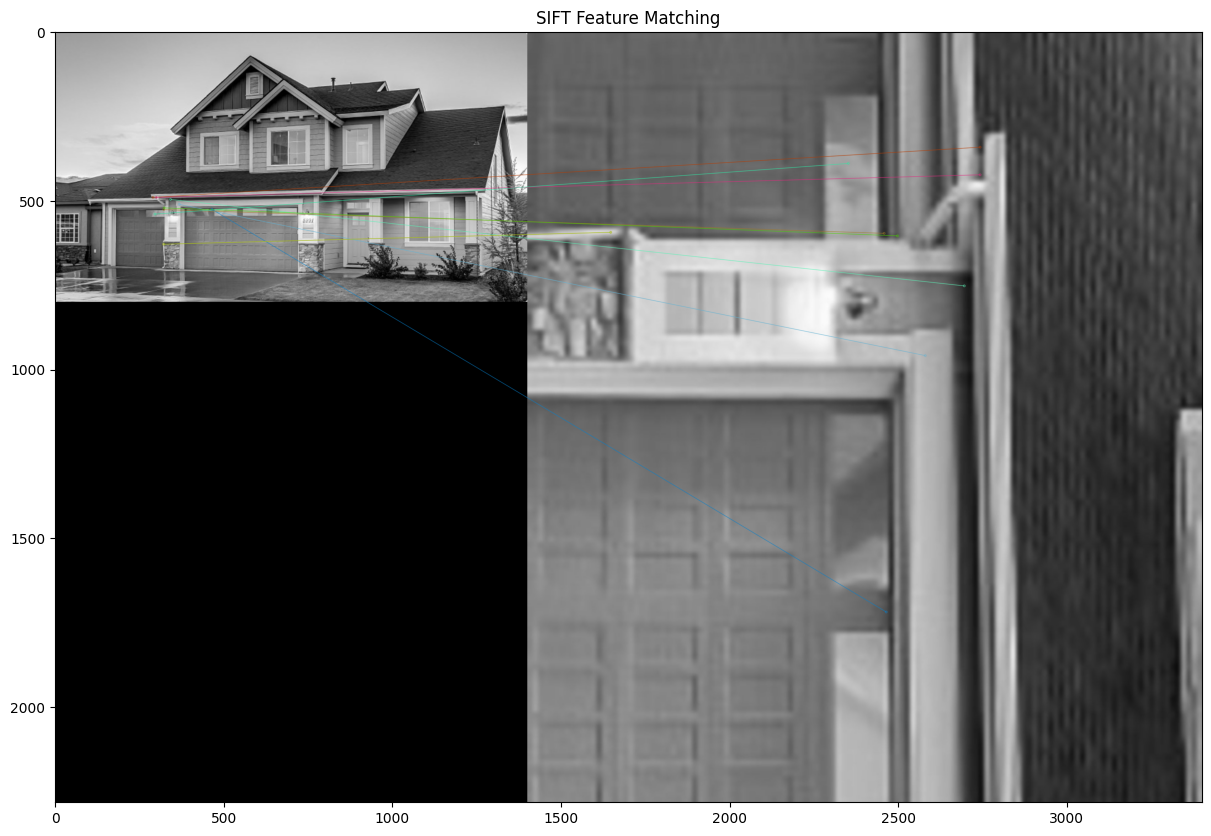

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지를 읽어옵니다.
img1 = cv2.imread('image.jpeg', cv2.IMREAD_GRAYSCALE)  # 첫 번째 이미지
img2 = cv2.imread('part.jpeg', cv2.IMREAD_GRAYSCALE)  # 두 번째 이미지

# SIFT 생성
sift = cv2.SIFT_create()

# SIFT 특징점과 디스크립터를 계산합니다.
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# 특징점을 매칭하기 위해 BFMatcher 객체를 생성합니다.
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# 디스크립터를 매칭합니다.
matches = bf.match(des1, des2)

# 매칭 결과를 거리 순으로 정렬합니다.
matches = sorted(matches, key=lambda x: x.distance)

# 매칭 결과를 그립니다.
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# 매칭 결과를 시각화합니다.
plt.figure(figsize=(20, 10))
plt.imshow(img_matches)
plt.title('SIFT Feature Matching')
plt.show()
